In [1]:
# Import packages
import os
import pandas as pd
import numpy as np
import re 
import networkx as nx
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from mpl_toolkits.basemap import Basemap
import bokeh.palettes as palette # For palette of colors

from matplotlib import rc

# Latex rendering for plotting
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = [r'\boldmath']

# Define color palette
col = palette.brewer['Spectral'][10] #(8)

# conda install -c conda-forge/label/cf202003 basemap 
# How I solve the installation problem
# https://stackoverflow.com/questions/63839163/maplotlib-and-basemap-cannot-import-name-dedent 
# conda install -c conda-forge basemap-data-hires

folder_name = 'plot/'
# Create data folder
if not os.path.isdir('./'+folder_name):
    os.mkdir('./'+folder_name)
    
# Create region list of Italy
df_region = pd.read_excel('../useful_datasets/italian_regions_dataset.xlsx',engine='openpyxl',index_col=0,header=[0])
df_region["capitals"] = df_region["capitals"].str.upper()

/Users/alicepagano/anaconda3/envs/life/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


## User dataset

In [2]:
df = pd.read_excel('../filtered_data/tweet_user_dataset.xlsx',engine='openpyxl',index_col=0,header=[0,1])

graph = nx.Graph()
graph.add_nodes_from(list(df[('user','id')]))
#graph.add_edges_from( list(zip(retweet[('tweet','id_original')],retweet[('tweet','id')])) )
#print('# of edges: {}'.format(graph.number_of_edges()))
print('# of nodes: {}'.format(graph.number_of_nodes()))

# of nodes: 174


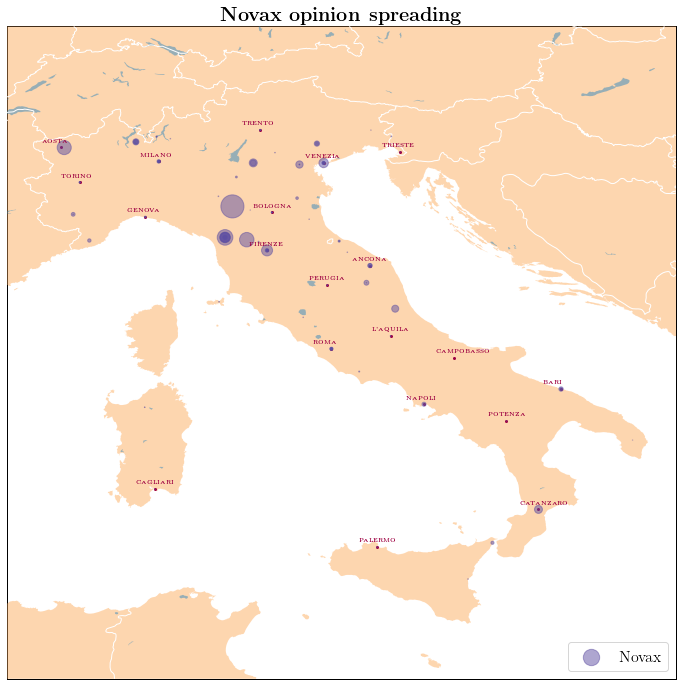

In [3]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon 
# sono i valori di lat/long degli angoli inferiori sinistro e superiore destro della mappa. 
# lat_0 lon_0 sono le coordinate del centro mappa
#m = Basemap(llcrnrlon=4.30, llcrnrlat=33.24, urcrnrlon=28.56, urcrnrlat=48.04,
#            lat_0=12.49, lon_0=41.92, resolution='h', epsg=4326, suppress_ticks=True)

# Create basemap
plt.figure(figsize = (12,12))
m = Basemap(llcrnrlon=6.30, llcrnrlat=35.6, urcrnrlon=19.06, urcrnrlat=48.04,
            lat_0=12.782117, lon_0=42.831995, resolution='h', epsg=4326, suppress_ticks=True)

m.drawmapboundary(fill_color='white',zorder=0)
m.fillcontinents(color=col[6],lake_color=col[1], alpha=0.5,zorder=1)
m.drawcountries(linewidth=1, color='white', zorder=2)
#m.drawcoastlines(linewidth=1, color='white', zorder=2)

# Plot city names on the basemap
for index, row in df_region.iterrows():
    m.plot(row['lon'],row['lat'],marker='o',color=col[9],markersize=2, alpha=1,zorder=3)
    plt.text(row['lon']-0.35, row['lat']+0.1, r'\bf{'+str(row['capitals'])+'}', color=col[9], fontsize=5,zorder=6)

# Create position dictionary
mx, my = m(df[('user','lon_province')].values, df[('user','lat_province')].values)
pos = {}
for count, elem in enumerate (df[('user','id')]):
    pos[elem] = (mx[count], my[count])

# Draw network on the basemap
collection = nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = graph.nodes(), 
                        node_color = col[0], alpha = 0.5, label='Novax',
                        node_size = list(10**5*df[('user','user_weight')]) ) 
#[counts['total_flight'][s]*3 for s in graph.nodes()]
collection.set_zorder(4)

#nx.draw_networkx_labels(G=graph, pos=pos)

plt.title(r'\bf{Novax opinion spreading}',fontsize=20)
plt.legend(loc='lower right',fontsize=16)
plt.savefig("plot/map_user.pdf",format='pdf',bbox_inches = "tight")
plt.show()

## Province dataset

In [4]:
df = pd.read_excel('../filtered_data/tweet_province_dataset.xlsx',engine='openpyxl',index_col=0,header=[0,1])

graph = nx.Graph()
graph.add_nodes_from(list(df[('user','province')]))
#graph.add_edges_from( list(zip(retweet[('tweet','id_original')],retweet[('tweet','id')])) )
#print('# of edges: {}'.format(graph.number_of_edges()))
print('# of nodes: {}'.format(graph.number_of_nodes()))

# of nodes: 52


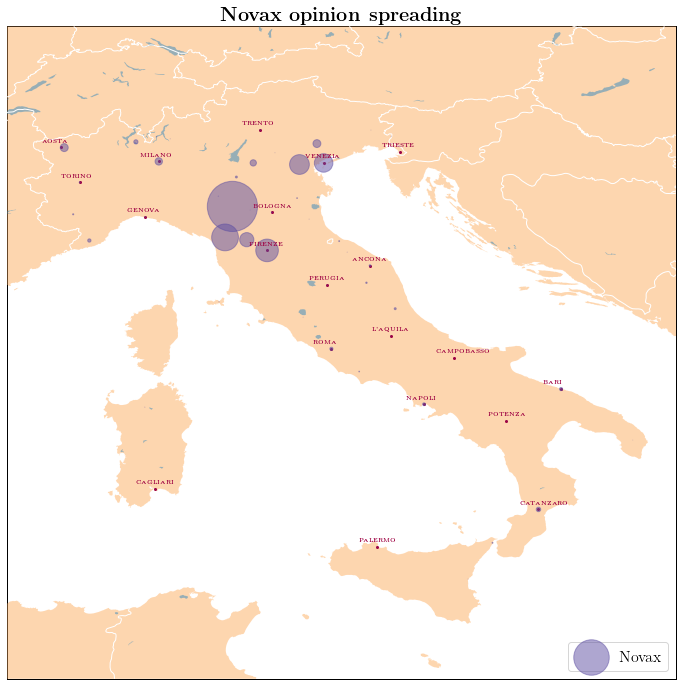

In [5]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon 
# sono i valori di lat/long degli angoli inferiori sinistro e superiore destro della mappa. 
# lat_0 lon_0 sono le coordinate del centro mappa
#m = Basemap(llcrnrlon=4.30, llcrnrlat=33.24, urcrnrlon=28.56, urcrnrlat=48.04,
#            lat_0=12.49, lon_0=41.92, resolution='h', epsg=4326, suppress_ticks=True)

# Create basemap
plt.figure(figsize = (12,12))
m = Basemap(llcrnrlon=6.30, llcrnrlat=35.6, urcrnrlon=19.06, urcrnrlat=48.04,
            lat_0=12.782117, lon_0=42.831995, resolution='h', epsg=4326, suppress_ticks=True)

m.drawmapboundary(fill_color='white',zorder=0)
m.fillcontinents(color=col[6],lake_color=col[1], alpha=0.5,zorder=1)
m.drawcountries(linewidth=1, color='white', zorder=2)
#m.drawcoastlines(linewidth=1, color='white', zorder=2)

# Plot city names on the basemap
for index, row in df_region.iterrows():
    m.plot(row['lon'],row['lat'],marker='o',color=col[9],markersize=2, alpha=1,zorder=3)
    plt.text(row['lon']-0.35, row['lat']+0.1, r'\bf{'+str(row['capitals'])+'}', color=col[9], fontsize=5,zorder=6)

# Create position dictionary
mx, my = m(df[('user','lon_province')].values, df[('user','lat_province')].values)
pos = {}
for count, elem in enumerate (df[('user','province')]):
    pos[elem] = (mx[count], my[count])

# Draw network on the basemap
collection = nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = graph.nodes(), 
                        node_color = col[0], alpha = 0.5, label='Novax',
                        node_size = list(20**3*df[('user','province_weight')]) ) 
#[counts['total_flight'][s]*3 for s in graph.nodes()]
collection.set_zorder(4)

#nx.draw_networkx_labels(G=graph, pos=pos)

plt.title(r'\bf{Novax opinion spreading}',fontsize=20)
plt.legend(loc='lower right',fontsize=16)
plt.savefig("plot/map_province.pdf",format='pdf',bbox_inches = "tight")
plt.show()

In [6]:
df.loc[df[('user','province_weight')].idxmax()][('user','province')]

"reggio nell'emilia"